'\nfrom torchvision import datasets, models, transforms\nimport torch.nn as nn\n\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\nmodel = models.resnet18(pretrained=True)\n\n#freeze all params\nfor params in model.parameters():\n  params.requires_grad_ = False\n\n#add a new final layer\nnr_filters = model.fc.in_features  #number of input features of last layer\nmodel.fc = nn.Linear(nr_filters, 1)\n\nmodel = model.to(device)'

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import os
import torch.nn as nn
from torchvision.models import resnet50
import cv2 as cv
import csv

In [ ]:
num_epochs = 4

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("device = ", device)

device =  cuda


In [ ]:
data_path = "/content/drive/MyDrive/Master AI/SecondYear/DeepLearning/dl-2022-medical"

train_path = data_path + "/train_images"
test_path = data_path + "/test_images"
validation_path = data_path + "/val_images"

train_labels = os.path.join(data_path,"train_labels.csv")
validation_labels = os.path.join(data_path,"val_labels.csv")

output_csv = os.path.join(data_path,"output_labels.csv")

In [ ]:
model_dense = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model_resnet_label1 = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=False)
model_resnet_label2 = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=False)
#comentariu: efficientnet V2 face overfit

'''

Epoch: 5 Batch: 0 loss: 0.05074221268296242
Training accuracy: 100.0 %
Epoch: 5 Batch: 30 loss: 0.13943761587142944
Training accuracy: 95.12903225806451 %
Epoch: 5 Batch: 60 loss: 0.20830003917217255
Training accuracy: 95.26229508196721 %
Epoch: 5 Batch: 90 loss: 0.12690839171409607
Training accuracy: 95.48351648351648 %
Epoch: 5 Batch: 120 loss: 0.15098780393600464
Training accuracy: 95.52066115702479 %
Epoch: 5 Batch: 150 loss: 0.1050100326538086
Training accuracy: 95.50331125827815 %
Epoch: 5 Batch: 180 loss: 0.18256396055221558
Training accuracy: 95.5193370165746 %
Epoch: 5 Batch: 210 loss: 0.07588346302509308
Training accuracy: 95.5308056872038 %
Epoch: 5 Batch: 240 loss: 0.1918269544839859
Training accuracy: 95.57261410788381 %
	validation_total =  100
	validation_correct =  88
	Validation accuracy: 88.0 %
	best validation accuracy: 83.7 %



	validation_total =  600
	validation_correct =  521
	Validation accuracy: 86.83333333333333 %
	best validation accuracy: 83.7 %



	validation_total =  1100
	validation_correct =  941
	Validation accuracy: 85.54545454545455 %
	best validation accuracy: 83.7 %



	validation_total =  1600
	validation_correct =  1352
	Validation accuracy: 84.5 %
	best validation accuracy: 83.7 %



Epoch: 6 Batch: 0 loss: 0.15204168856143951
Training accuracy: 97.0 %
Epoch: 6 Batch: 30 loss: 0.10789883881807327
Training accuracy: 96.64516129032258 %
Epoch: 6 Batch: 60 loss: 0.1482362449169159
Training accuracy: 96.75409836065573 %
Epoch: 6 Batch: 90 loss: 0.04099703207612038
Training accuracy: 96.68131868131869 %
Epoch: 6 Batch: 120 loss: 0.05305067449808121
Training accuracy: 96.62809917355372 %
Epoch: 6 Batch: 150 loss: 0.13397090137004852
Training accuracy: 96.57615894039735 %
Epoch: 6 Batch: 180 loss: 0.13454224169254303
Training accuracy: 96.65193370165746 %
Epoch: 6 Batch: 210 loss: 0.06387896090745926
Training accuracy: 96.62085308056872 %
Epoch: 6 Batch: 240 loss: 0.2088995724916458
Training accuracy: 96.5643153526971 %
	validation_total =  100
	validation_correct =  83
	Validation accuracy: 83.0 %
	best validation accuracy: 84.35000000000001 %



	validation_total =  600
	validation_correct =  500
	Validation accuracy: 83.33333333333334 %
	best validation accuracy: 84.35000000000001 %



	validation_total =  1100
	validation_correct =  932
	Validation accuracy: 84.72727272727273 %
	best validation accuracy: 84.35000000000001 %



	validation_total =  1600
	validation_correct =  1344
	Validation accuracy: 84.0 %
	best validation accuracy: 84.35000000000001 %



Epoch: 7 Batch: 0 loss: 0.05758191645145416
Training accuracy: 99.0 %
Epoch: 7 Batch: 30 loss: 0.06365837901830673
Training accuracy: 97.51612903225806 %
Epoch: 7 Batch: 60 loss: 0.15366123616695404
Training accuracy: 97.55737704918033 %
Epoch: 7 Batch: 90 loss: 0.058595508337020874
Training accuracy: 97.5934065934066 %
Epoch: 7 Batch: 120 loss: 0.13339287042617798
Training accuracy: 97.52892561983471 %
Epoch: 7 Batch: 150 loss: 0.06478319317102432
Training accuracy: 97.43708609271523 %
Epoch: 7 Batch: 180 loss: 0.16768436133861542
Training accuracy: 97.43093922651934 %
Epoch: 7 Batch: 210 loss: 0.0621563084423542
Training accuracy: 97.44549763033176 %
Epoch: 7 Batch: 240 loss: 0.016323940828442574
Training accuracy: 97.48132780082987 %
	validation_total =  100
	validation_correct =  83
	Validation accuracy: 83.0 %
	best validation accuracy: 84.35000000000001 %



	validation_total =  600
	validation_correct =  504
	Validation accuracy: 84.0 %
	best validation accuracy: 84.35000000000001 %



	validation_total =  1100
	validation_correct =  935
	Validation accuracy: 85.0 %
	best validation accuracy: 84.35000000000001 %



	validation_total =  1600
	validation_correct =  1350
	Validation accuracy: 84.375 %
	best validation accuracy: 84.35000000000001 %



Epoch: 8 Batch: 0 loss: 0.07339578866958618
Training accuracy: 99.0 %
Epoch: 8 Batch: 30 loss: 0.11731687188148499
Training accuracy: 98.0 %
Epoch: 8 Batch: 60 loss: 0.10672486573457718
Training accuracy: 97.9672131147541 %
Epoch: 8 Batch: 90 loss: 0.0270247720181942
Training accuracy: 97.93406593406594 %
Epoch: 8 Batch: 120 loss: 0.02619265578687191
Training accuracy: 97.93388429752066 %
Epoch: 8 Batch: 150 loss: 0.1556309461593628
Training accuracy: 97.82781456953641 %
Epoch: 8 Batch: 180 loss: 0.021376587450504303
Training accuracy: 97.81767955801105 %
Epoch: 8 Batch: 210 loss: 0.05431853234767914
Training accuracy: 97.82464454976304 %
Epoch: 8 Batch: 240 loss: 0.03312668949365616
Training accuracy: 97.81742738589212 %
	validation_total =  100
	validation_correct =  85
	Validation accuracy: 85.0 %
	best validation accuracy: 84.85000000000001 %



	validation_total =  600
	validation_correct =  507
	Validation accuracy: 84.5 %
	best validation accuracy: 84.85000000000001 %



	validation_total =  1100
	validation_correct =  924
	Validation accuracy: 84.0 %
	best validation accuracy: 84.85000000000001 %



	validation_total =  1600
	validation_correct =  1346
	Validation accuracy: 84.125 %
	best validation accuracy: 84.85000000000001 %



Epoch: 9 Batch: 0 loss: 0.08931524306535721
Training accuracy: 98.0 %

'''

model_resnet_label3 = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=False)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
model_resnet_label2

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
nr_filters = model_resnet_label1.classifier.in_features  #number of input features of last layer
model_resnet_label1.classifier = nn.Linear(nr_filters, 2)

nr_filters = model_resnet_label2.classifier[6].in_features  #number of input features of last layer
model_resnet_label2.classifier[6] = nn.Linear(nr_filters, 2)

nr_filters = model_resnet_label3.classifier.in_features  #number of input features of last layer
model_resnet_label3.classifier = nn.Linear(nr_filters, 2)

In [ ]:
model_resnet_label2

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [ ]:
'''
if(torch.cuda.is_available()):
    model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)'''

'\nif(torch.cuda.is_available()):\n    model = model.cuda()\ncriterion = nn.CrossEntropyLoss()\noptimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)'

# Create the training list:

In [ ]:
'''print("starting the listdir os")

list_images_paths = os.listdir(train_path)'''

'print("starting the listdir os")\n\nlist_images_paths = os.listdir(train_path)'

In [ ]:
'''

print("starting to create the list")

train_images = []
i = 0

print(len(list_images_paths))

for image_name in list_images_paths:
    image = cv.imread(train_path + "/" + image_name)
    train_images.append((image, image_name))
    if i<10 or (i<1000 and i%200==0) or i%1000==0:
      print(i)
    i += 1'''

'\n\nprint("starting to create the list")\n\ntrain_images = []\ni = 0\n\nprint(len(list_images_paths))\n\nfor image_name in list_images_paths:\n    image = cv.imread(train_path + "/" + image_name)\n    train_images.append((image, image_name))\n    if i<10 or (i<1000 and i%200==0) or i%1000==0:\n      print(i)\n    i += 1'

In [ ]:
'''import pickle

exampleObj = {'Python':3,'KDE':5,'Windows':10}

images_obj = open(data_path + '/train_images.obj', 'wb')
pickle.dump(train_images,images_obj)
fileObj.close()'''

"import pickle\n\nexampleObj = {'Python':3,'KDE':5,'Windows':10}\n\nimages_obj = open(data_path + '/train_images.obj', 'wb')\npickle.dump(train_images,images_obj)\nfileObj.close()"

In [ ]:
import pickle

fileObj = open(data_path + '/train_images.obj', 'rb')
exampleObj = pickle.load(fileObj)
fileObj.close()
print(exampleObj[0])

train_images = exampleObj

(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), '21594.png')


# Create the validtion list:


In [ ]:
print("starting the listdir os for validation")

list_images_paths = os.listdir(validation_path)

starting the listdir os for validation


In [ ]:

print("starting to create the list")

validation_images = []
i = 0

print(len(list_images_paths))

for image_name in list_images_paths:
    image = cv.imread(validation_path + "/" + image_name)
    if i <1500:
      train_images.append((image, image_name))
    else:
      validation_images.append((image, image_name))
    if i<10 or (i<1000 and i%200==0) or i%1000==0:
      print(i)
    i += 1
print("len validation images = ", len(validation_images))

starting to create the list
3000
0
1
2
3
4
5
6
7
8
9
200
400
600
800
1000
2000
len validation images =  1500


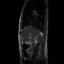

(64, 64, 3)


In [ ]:
orig_img = train_images[200][0]

from google.colab.patches import cv2_imshow

cv2_imshow(orig_img)
print(orig_img.shape)

In [ ]:
'''for i in range(0, 64):
  for j in range(0, 64):
    if (orig_img[i][j][0]==0 and orig_img[])'''

'for i in range(0, 64):\n  for j in range(0, 64):\n    if (orig_img[i][j][0]==0 and orig_img[])'

In [ ]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch
import numpy as np
import torchvision.transforms as T

In [ ]:
def noisy_multiple(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,0.9,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)
      noisy = image + image * gauss
      return noisy

In [ ]:
noised_img = noisy_multiple("speckle", orig_img)

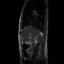

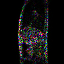

In [ ]:
from google.colab.patches import cv2_imshow


cv2_imshow(orig_img)
cv2_imshow(noised_img)

In [ ]:
#fake_image = add_noise(train_images[200][0])

In [ ]:
train_images[0]

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), '21594.png')

In [ ]:
'''test_tensor = torch.tensor([train_images[0][0]])
print("test_tensor shape is ", test_tensor.shape)
test_tensor = torch.permute(test_tensor, (0, 3, 1, 2))
model(test_tensor.float())'''

'test_tensor = torch.tensor([train_images[0][0]])\nprint("test_tensor shape is ", test_tensor.shape)\ntest_tensor = torch.permute(test_tensor, (0, 3, 1, 2))\nmodel(test_tensor.float())'

In [ ]:
with open(train_labels, mode='r') as infile:
    reader = csv.reader(infile)
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        train_data = {rows[0]:[float(rows[1]), float(rows[2]), float(rows[3])] for rows in reader if rows[1]!='label1'}
        #train_data = {rows[0]:int(rows[1]) for rows in reader if rows[1]!='label1'}

In [ ]:
with open(validation_labels, mode='r') as infile:
    reader = csv.reader(infile)
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        validation_data = {rows[0]:[float(rows[1]), float(rows[2]), float(rows[3])] for rows in reader if rows[1]!='label1'}
        #train_data = {rows[0]:int(rows[1]) for rows in reader if rows[1]!='label1'}

In [ ]:
validation_data

{'40000.png': [0.0, 0.0, 0.0],
 '40001.png': [0.0, 0.0, 0.0],
 '40002.png': [0.0, 0.0, 0.0],
 '40003.png': [1.0, 1.0, 0.0],
 '40004.png': [0.0, 0.0, 0.0],
 '40005.png': [0.0, 0.0, 0.0],
 '40006.png': [0.0, 0.0, 0.0],
 '40007.png': [0.0, 0.0, 0.0],
 '40008.png': [0.0, 0.0, 0.0],
 '40009.png': [0.0, 0.0, 0.0],
 '40010.png': [0.0, 0.0, 0.0],
 '40011.png': [1.0, 1.0, 1.0],
 '40012.png': [1.0, 1.0, 1.0],
 '40013.png': [1.0, 1.0, 0.0],
 '40014.png': [1.0, 0.0, 0.0],
 '40015.png': [0.0, 0.0, 0.0],
 '40016.png': [1.0, 0.0, 0.0],
 '40017.png': [1.0, 0.0, 0.0],
 '40018.png': [1.0, 0.0, 0.0],
 '40019.png': [1.0, 1.0, 1.0],
 '40020.png': [0.0, 0.0, 0.0],
 '40021.png': [0.0, 0.0, 0.0],
 '40022.png': [0.0, 0.0, 0.0],
 '40023.png': [1.0, 1.0, 0.0],
 '40024.png': [1.0, 1.0, 1.0],
 '40025.png': [1.0, 1.0, 1.0],
 '40026.png': [1.0, 1.0, 0.0],
 '40027.png': [0.0, 0.0, 0.0],
 '40028.png': [0.0, 0.0, 0.0],
 '40029.png': [0.0, 0.0, 0.0],
 '40030.png': [1.0, 1.0, 1.0],
 '40031.png': [0.0, 0.0, 0.0],
 '40032.

In [ ]:
train_data

{'10000.png': [0.0, 0.0, 0.0],
 '10001.png': [0.0, 0.0, 1.0],
 '10002.png': [0.0, 0.0, 0.0],
 '10003.png': [0.0, 0.0, 0.0],
 '10004.png': [0.0, 0.0, 0.0],
 '10005.png': [0.0, 0.0, 0.0],
 '10006.png': [1.0, 1.0, 1.0],
 '10007.png': [1.0, 0.0, 0.0],
 '10008.png': [0.0, 0.0, 0.0],
 '10009.png': [0.0, 1.0, 0.0],
 '10010.png': [0.0, 0.0, 0.0],
 '10011.png': [0.0, 0.0, 0.0],
 '10012.png': [0.0, 0.0, 0.0],
 '10013.png': [0.0, 0.0, 0.0],
 '10014.png': [0.0, 0.0, 0.0],
 '10015.png': [1.0, 1.0, 0.0],
 '10016.png': [1.0, 1.0, 1.0],
 '10017.png': [1.0, 1.0, 0.0],
 '10018.png': [1.0, 1.0, 0.0],
 '10019.png': [0.0, 0.0, 0.0],
 '10020.png': [1.0, 0.0, 0.0],
 '10021.png': [0.0, 0.0, 0.0],
 '10022.png': [1.0, 1.0, 0.0],
 '10023.png': [0.0, 0.0, 0.0],
 '10024.png': [0.0, 0.0, 0.0],
 '10025.png': [1.0, 1.0, 1.0],
 '10026.png': [0.0, 0.0, 0.0],
 '10027.png': [0.0, 0.0, 0.0],
 '10028.png': [0.0, 0.0, 0.0],
 '10029.png': [0.0, 0.0, 0.0],
 '10030.png': [0.0, 0.0, 0.0],
 '10031.png': [0.0, 0.0, 0.0],
 '10032.

In [ ]:

train_data[train_images[0][1]]

[1.0, 1.0, 1.0]

In [ ]:
train_data

{'10000.png': [0.0, 0.0, 0.0],
 '10001.png': [0.0, 0.0, 1.0],
 '10002.png': [0.0, 0.0, 0.0],
 '10003.png': [0.0, 0.0, 0.0],
 '10004.png': [0.0, 0.0, 0.0],
 '10005.png': [0.0, 0.0, 0.0],
 '10006.png': [1.0, 1.0, 1.0],
 '10007.png': [1.0, 0.0, 0.0],
 '10008.png': [0.0, 0.0, 0.0],
 '10009.png': [0.0, 1.0, 0.0],
 '10010.png': [0.0, 0.0, 0.0],
 '10011.png': [0.0, 0.0, 0.0],
 '10012.png': [0.0, 0.0, 0.0],
 '10013.png': [0.0, 0.0, 0.0],
 '10014.png': [0.0, 0.0, 0.0],
 '10015.png': [1.0, 1.0, 0.0],
 '10016.png': [1.0, 1.0, 1.0],
 '10017.png': [1.0, 1.0, 0.0],
 '10018.png': [1.0, 1.0, 0.0],
 '10019.png': [0.0, 0.0, 0.0],
 '10020.png': [1.0, 0.0, 0.0],
 '10021.png': [0.0, 0.0, 0.0],
 '10022.png': [1.0, 1.0, 0.0],
 '10023.png': [0.0, 0.0, 0.0],
 '10024.png': [0.0, 0.0, 0.0],
 '10025.png': [1.0, 1.0, 1.0],
 '10026.png': [0.0, 0.0, 0.0],
 '10027.png': [0.0, 0.0, 0.0],
 '10028.png': [0.0, 0.0, 0.0],
 '10029.png': [0.0, 0.0, 0.0],
 '10030.png': [0.0, 0.0, 0.0],
 '10031.png': [0.0, 0.0, 0.0],
 '10032.

In [ ]:
#train_dataset2 = []
train_dataset3 = []

for i in range(len(train_images)):
  if i%1000==0:
    print("i = ", i)
    print(train_images[i][1] ,"\n\n")
  '''train_dataset_sample = (train_images[i][0].astype(float), train_data[train_images[i][1]][0])
  train_dataset1.append(train_dataset_sample)
  if i%2==0:
    train_dataset_noised_sample1 = noisy_multiple("gauss", train_dataset_sample[0])
    train_dataset_noised_sample2 = noisy_multiple("s&p", train_dataset_sample[0])
    train_dataset1.append((train_dataset_noised_sample1.astype(float), train_dataset_sample[1]))
    train_dataset1.append((train_dataset_noised_sample2.astype(float), train_dataset_sample[1]))

  train_dataset_sample = (train_images[i][0].astype(float), train_data[train_images[i][1]][1])
  train_dataset2.append(train_dataset_sample)
  if i%2==0:
    train_dataset_noised_sample1 = noisy_multiple("gauss", train_dataset_sample[0])
    train_dataset_noised_sample2 = noisy_multiple("s&p", train_dataset_sample[0])
    train_dataset2.append((train_dataset_noised_sample1.astype(float), train_dataset_sample[1]))
    train_dataset2.append((train_dataset_noised_sample2.astype(float), train_dataset_sample[1]))'''
  try:
    train_dataset_sample = (train_images[i][0].astype(float), train_data[train_images[i][1]][2])
  except:
    train_dataset_sample = (train_images[i][0].astype(float), validation_data[train_images[i][1]][2])
  train_dataset3.append(train_dataset_sample)
  if i%2==0:
    train_dataset_noised_sample1 = noisy_multiple("gauss", train_dataset_sample[0])
    train_dataset_noised_sample2 = noisy_multiple("speckle", train_dataset_sample[0])
    train_dataset3.append((train_dataset_noised_sample1.astype(float), train_dataset_sample[1]))
    train_dataset3.append((train_dataset_noised_sample2.astype(float), train_dataset_sample[1]))

i =  0
21594.png 




<ipython-input-20-dc736dd755c7>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-20-dc736dd755c7>:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


i =  1000
19795.png 


i =  2000
17683.png 


i =  3000
18951.png 


i =  4000
16841.png 


i =  5000
16498.png 


i =  6000
15566.png 


i =  7000
14714.png 


i =  8000
11900.png 


i =  9000
12503.png 


i =  10000
11315.png 


i =  11000
10100.png 


i =  12000
42575.png 


i =  13000
41358.png 




In [ ]:
train_dataset1 = []
train_dataset2 = []

for i in range(len(train_images)):
  if i%1000==0:
    print("i = ", i)
    print(train_images[i][1] ,"\n\n")
  try:
    train_dataset_sample = (train_images[i][0].astype(float), train_data[train_images[i][1]][0])
  except:
    train_dataset_sample = (train_images[i][0].astype(float), validation_data[train_images[i][1]][0])
  train_dataset1.append(train_dataset_sample)
  if i%2==0:
    train_dataset_noised_sample1 = noisy_multiple("speckle", train_dataset_sample[0])
    train_dataset_noised_sample2 = noisy_multiple("gauss", train_dataset_sample[0])
    train_dataset1.append((train_dataset_noised_sample1.astype(float), train_dataset_sample[1]))
    train_dataset1.append((train_dataset_noised_sample2.astype(float), train_dataset_sample[1]))




  '''try:
    train_dataset_sample = (train_images[i][0].astype(float), train_data[train_images[i][1]][1])
  except:
    train_dataset_sample = (train_images[i][0].astype(float), validation_data[train_images[i][1]][1])
  train_dataset2.append(train_dataset_sample)
  if i%2==0:
    train_dataset_noised_sample1 = noisy_multiple("gauss", train_dataset_sample[0])
    train_dataset_noised_sample2 = noisy_multiple("s&p", train_dataset_sample[0])
    train_dataset2.append((train_dataset_noised_sample1.astype(float), train_dataset_sample[1]))
    train_dataset2.append((train_dataset_noised_sample2.astype(float), train_dataset_sample[1]))'''

i =  0
21594.png 




<ipython-input-20-dc736dd755c7>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 1
<ipython-input-20-dc736dd755c7>:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[coords] = 0


i =  1000
19795.png 


i =  2000
17683.png 


i =  3000
18951.png 


i =  4000
16841.png 


i =  5000
16498.png 


i =  6000
15566.png 


i =  7000
14714.png 


i =  8000
11900.png 


i =  9000
12503.png 


i =  10000
11315.png 


i =  11000
10100.png 


i =  12000
42575.png 


i =  13000
41358.png 




In [ ]:
#del train_dataset1

In [ ]:
validation_dataset1 = []
validation_dataset2 = []
validation_dataset3 = []

for i in range(len(validation_images)):
  if i%1000==0:
    print("i = ", i)
    print(validation_images[i][1] ,"\n\n")
  validation_dataset_sample = (validation_images[i][0].astype(float), validation_data[validation_images[i][1]][0])
  validation_dataset1.append(validation_dataset_sample)

  validation_dataset_sample = (validation_images[i][0].astype(float), validation_data[validation_images[i][1]][1])
  validation_dataset2.append(validation_dataset_sample)

  validation_dataset_sample = (validation_images[i][0].astype(float), validation_data[validation_images[i][1]][2])
  validation_dataset3.append(validation_dataset_sample)

i =  0
40303.png 


i =  1000
41144.png 




In [ ]:
#len(train_dataset3)
len(validation_dataset3)

1500

In [ ]:
train_dataset1[-2][0].astype(float)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
train_dataset1[0][0].astype(float)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
len(train_dataset2)

0

In [ ]:
len(train_images)

13500

In [ ]:
train_images[0]

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8), '21594.png')

In [ ]:
train_dataset1

[(array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]), 1.0), 

In [ ]:
from torch.utils.data import DataLoader
loaders_label1 = {
    'train' : torch.utils.data.DataLoader(train_dataset1,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'validation' : torch.utils.data.DataLoader(validation_dataset1,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)
}


'''
loaders_label2 = {
    'train' : torch.utils.data.DataLoader(train_dataset2,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'validation' : torch.utils.data.DataLoader(validation_dataset2,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)
}

loaders_label3 = {
    'train' : torch.utils.data.DataLoader(train_dataset3,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
    'validation' : torch.utils.data.DataLoader(validation_dataset3,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)
}'''

"\nloaders_label2 = {\n    'train' : torch.utils.data.DataLoader(train_dataset2, \n                                          batch_size=100, \n                                          shuffle=True, \n                                          num_workers=1),\n    'validation' : torch.utils.data.DataLoader(validation_dataset2, \n                                          batch_size=100, \n                                          shuffle=True, \n                                          num_workers=1)\n}\n\nloaders_label3 = {\n    'train' : torch.utils.data.DataLoader(train_dataset3, \n                                          batch_size=100, \n                                          shuffle=True, \n                                          num_workers=1),\n    'validation' : torch.utils.data.DataLoader(validation_dataset3, \n                                          batch_size=100, \n                                          shuffle=True, \n                                          nu

In [ ]:
#del train_dataset1
del train_dataset2
del train_dataset3

In [ ]:
#del validation_dataset1
#del validation_dataset2
#del validation_dataset3

# Trraining (the kaggle version)


In [ ]:
#new_mdl = copy.deepcopy(model)

In [ ]:
import copy

In [ ]:

if(torch.cuda.is_available()):
    model_resnet_label1 = model_resnet_label1.cuda()
criterion_label1 = nn.CrossEntropyLoss()
optimizer_label1 = optim.SGD(model_resnet_label1.parameters(), lr=0.0001, momentum=0.9)

best_acc = 0
best_model_label1 = copy.deepcopy(model_resnet_label1)

import time

print('Training....')
total = 0
correct = 0
start = time.time()

for epoch in range(40):
    for i, data in enumerate(loaders_label1['train']):
        images, labels = data
        model_resnet_label1.train()
        if(torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        optimizer_label1.zero_grad()
        images = torch.permute(images, (0, 3, 1, 2))
        outputs = model_resnet_label1(images.float())
        #print("outputs[0] is", outputs[0])

        _, predicted = torch.max(outputs, 1)
        #print("predicted is ", predicted)
        #print("predicted[0] is ", predicted[0])

        total += labels.size(0)
        correct += (predicted == labels).sum().item()


        labels = labels.type(torch.LongTensor)
        labels = labels.to(device)
        loss = criterion_label1(outputs, labels)
        if(i%30 == 0):
            print('Epoch: {} Batch: {} loss: {}'.format(epoch, i, loss.item()))
            print('Training accuracy: {} %'.format((correct/total)*100))

        loss.backward()
        optimizer_label1.step()
    with torch.no_grad():
      model_resnet_label1.eval()
      validation_correct = 0
      validation_total = 0
      for i, data in enumerate(loaders_label1['validation']):
        images, labels = data
        if(torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        images = torch.permute(images, (0, 3, 1, 2))
        outputs = model_resnet_label1(images.float())
        #print("outputs[0] is", outputs[0])

        _, predicted = torch.max(outputs, 1)
        #print("predicted is ", predicted)
        #print("predicted[0] is ", predicted[0])

        validation_total += labels.size(0)
        validation_correct += (predicted == labels).sum().item()
        if(i%5 == 0):
          print("\tvalidation_total = ", validation_total)
          print("\tvalidation_correct = ", validation_correct)
          print('\tValidation accuracy: {} %'.format((validation_correct/validation_total)*100))
          print('\tbest validation accuracy: {} %\n\n\n'.format(best_acc))
      acc = (validation_correct/validation_total)*100
      if acc>best_acc:
        best_acc = acc
        best_model_label1 = copy.deepcopy(model_resnet_label1)

      '''cum_loss = 0
      for x_batch, y_batch in loaders_label1['validation']:
        x_batch = x_batch.to(device)
        y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
        y_batch = y_batch.to(device)

        #model to eval mode
        model.eval()

        x_batch = torch.tensor(x_batch)
        x_batch = x_batch.to(device)
        x_batch = torch.permute(x_batch, (0, 3, 1, 2))

        yhat = model(x_batch.float())
        val_loss = loss_fn(yhat,y_batch)
        cum_loss += loss/len(loaders_label1['validation'])
        val_losses.append(val_loss.item())


      epoch_test_losses.append(cum_loss)
      print('Epoch : {}, val loss : {}'.format(epoch+1,cum_loss))

      best_loss = min(epoch_test_losses)

      #save best model
      if cum_loss <= best_loss:
        best_model_wts = model.state_dict()

      #early stopping
      early_stopping_counter = 0
      if cum_loss > best_loss:
        early_stopping_counter +=1

      if (early_stopping_counter == early_stopping_tolerance) or (best_loss <= early_stopping_threshold):
        print("/nTerminating: early stopping")
        break #terminate training'''

print('Training Completed in: {} secs'.format(time.time()-start))
print('Training accuracy: {} %'.format((correct/total)*100))



Training....
Epoch: 0 Batch: 0 loss: 0.7157410383224487
Training accuracy: 34.0 %
Epoch: 0 Batch: 30 loss: 0.6040415167808533
Training accuracy: 62.29032258064516 %
Epoch: 0 Batch: 60 loss: 0.49115267395973206
Training accuracy: 69.77049180327869 %
Epoch: 0 Batch: 90 loss: 0.5296754837036133
Training accuracy: 72.45054945054945 %
Epoch: 0 Batch: 120 loss: 0.5008379220962524
Training accuracy: 73.50413223140497 %
Epoch: 0 Batch: 150 loss: 0.4649801552295685
Training accuracy: 74.82781456953643 %
Epoch: 0 Batch: 180 loss: 0.4477187693119049
Training accuracy: 75.80662983425415 %
Epoch: 0 Batch: 210 loss: 0.43652984499931335
Training accuracy: 76.29857819905213 %
Epoch: 0 Batch: 240 loss: 0.439609557390213
Training accuracy: 76.87136929460581 %
	validation_total =  100
	validation_correct =  82
	Validation accuracy: 82.0 %
	best validation accuracy: 0 %



	validation_total =  600
	validation_correct =  478
	Validation accuracy: 79.66666666666666 %
	best validation accuracy: 0 %



	valid

In [ ]:
best_acc

91.60000000000001

In [ ]:
import pickle



model_obj = open(data_path + '/' + str(best_acc) + 'label1_model.obj', 'wb')
pickle.dump(best_model_label1,model_obj)
fileObj.close()

In [ ]:
if(torch.cuda.is_available()):
    model_resnet_label2 = model_resnet_label2.cuda()
criterion_label2 = nn.CrossEntropyLoss()
optimizer_label2 = optim.SGD(model_resnet_label2.parameters(), lr=0.0002, momentum=0.8)

best_acc = 0
best_model_label2 = copy.deepcopy(model_resnet_label2)

import time

print('Training....')
total = 0
correct = 0
start = time.time()

for epoch in range(50):
    total = 0
    correct = 0
    for i, data in enumerate(loaders_label2['train']):
        images, labels = data
        model_resnet_label2.train()
        if(torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        optimizer_label2.zero_grad()
        images = torch.permute(images, (0, 3, 1, 2))
        outputs = model_resnet_label2(images.float())
        #print("outputs[0] is", outputs[0])

        _, predicted = torch.max(outputs, 1)
        #print("predicted is ", predicted)
        #print("predicted[0] is ", predicted[0])

        total += labels.size(0)
        correct += (predicted == labels).sum().item()


        labels = labels.type(torch.LongTensor)
        labels = labels.to(device)
        loss = criterion_label2(outputs, labels)
        if(i%30 == 0):
            print('Epoch: {} Batch: {} loss: {}'.format(epoch, i, loss.item()))
            print('Training accuracy: {} %'.format((correct/total)*100))

        loss.backward()
        optimizer_label2.step()
    with torch.no_grad():
      model_resnet_label2.eval()
      validation_correct = 0
      validation_total = 0
      for i, data in enumerate(loaders_label2['validation']):
        images, labels = data
        if(torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        images = torch.permute(images, (0, 3, 1, 2))
        outputs = model_resnet_label2(images.float())
        #print("outputs[0] is", outputs[0])

        _, predicted = torch.max(outputs, 1)
        #print("predicted is ", predicted)
        #print("predicted[0] is ", predicted[0])

        validation_total += labels.size(0)
        validation_correct += (predicted == labels).sum().item()
        if(i%5 == 0):
          print("\tvalidation_total = ", validation_total)
          print("\tvalidation_correct = ", validation_correct)
          print('\tValidation accuracy: {} %'.format((validation_correct/validation_total)*100))
          print('\tbest validation accuracy: {} %\n\n\n'.format(best_acc))
      acc = (validation_correct/validation_total)*100
      if acc>best_acc:
        best_acc = acc
        best_model_label2 = copy.deepcopy(model_resnet_label2)

      '''cum_loss = 0
      for x_batch, y_batch in loaders_label2['validation']:
        x_batch = x_batch.to(device)
        y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
        y_batch = y_batch.to(device)

        #model to eval mode
        model.eval()

        x_batch = torch.tensor(x_batch)
        x_batch = x_batch.to(device)
        x_batch = torch.permute(x_batch, (0, 3, 1, 2))

        yhat = model(x_batch.float())
        val_loss = loss_fn(yhat,y_batch)
        cum_loss += loss/len(loaders_label2['validation'])
        val_losses.append(val_loss.item())


      epoch_test_losses.append(cum_loss)
      print('Epoch : {}, val loss : {}'.format(epoch+1,cum_loss))

      best_loss = min(epoch_test_losses)

      #save best model
      if cum_loss <= best_loss:
        best_model_wts = model.state_dict()

      #early stopping
      early_stopping_counter = 0
      if cum_loss > best_loss:
        early_stopping_counter +=1

      if (early_stopping_counter == early_stopping_tolerance) or (best_loss <= early_stopping_threshold):
        print("/nTerminating: early stopping")
        break #terminate training'''

print('Training Completed in: {} secs'.format(time.time()-start))
print('Training accuracy: {} %'.format((correct/total)*100))

Training....


NameError: ignored

In [ ]:
best_acc

In [ ]:
import pickle



model_obj = open(data_path + '/' + str(best_acc) + 'label2_model.obj', 'wb')
pickle.dump(best_model_label2,model_obj)
fileObj.close()

In [ ]:
if(torch.cuda.is_available()):
    model_resnet_label3 = model_resnet_label3.cuda()
criterion_label3 = nn.CrossEntropyLoss()
optimizer_label3 = optim.SGD(model_resnet_label3.parameters(), lr=0.001, momentum=0.9)

best_acc = 0
best_model_label3 = copy.deepcopy(model_resnet_label3)

import time

print('Training....')
total = 0
correct = 0
start = time.time()

for epoch in range(50):
    for i, data in enumerate(loaders_label3['train']):
        images, labels = data
        model_resnet_label3.train()
        if(torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        optimizer_label3.zero_grad()
        images = torch.permute(images, (0, 3, 1, 2))
        outputs = model_resnet_label3(images.float())
        #print("outputs[0] is", outputs[0])

        _, predicted = torch.max(outputs, 1)
        #print("predicted is ", predicted)
        #print("predicted[0] is ", predicted[0])

        total += labels.size(0)
        correct += (predicted == labels).sum().item()


        labels = labels.type(torch.LongTensor)
        labels = labels.to(device)
        loss = criterion_label3(outputs, labels)
        if(i%30 == 0):
            print('Epoch: {} Batch: {} loss: {}'.format(epoch, i, loss.item()))
            print('Training accuracy: {} %'.format((correct/total)*100))

        loss.backward()
        optimizer_label3.step()
    with torch.no_grad():
      model_resnet_label3.eval()
      validation_correct = 0
      validation_total = 0
      for i, data in enumerate(loaders_label3['validation']):
        images, labels = data
        if(torch.cuda.is_available()):
            images = images.cuda()
            labels = labels.cuda()

        images = torch.permute(images, (0, 3, 1, 2))
        outputs = model_resnet_label3(images.float())
        #print("outputs[0] is", outputs[0])

        _, predicted = torch.max(outputs, 1)
        #print("predicted is ", predicted)
        #print("predicted[0] is ", predicted[0])

        validation_total += labels.size(0)
        validation_correct += (predicted == labels).sum().item()
        if(i%5 == 0):
          print("\tvalidation_total = ", validation_total)
          print("\tvalidation_correct = ", validation_correct)
          print('\tValidation accuracy: {} %'.format((validation_correct/validation_total)*100))
          print('\tbest validation accuracy: {} %\n\n\n'.format(best_acc))
      acc = (validation_correct/validation_total)*100
      if acc>best_acc:
        best_acc = acc
        best_model_label3 = copy.deepcopy(model_resnet_label3)

      '''cum_loss = 0
      for x_batch, y_batch in loaders_label3['validation']:
        x_batch = x_batch.to(device)
        y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
        y_batch = y_batch.to(device)

        #model to eval mode
        model.eval()

        x_batch = torch.tensor(x_batch)
        x_batch = x_batch.to(device)
        x_batch = torch.permute(x_batch, (0, 3, 1, 2))

        yhat = model(x_batch.float())
        val_loss = loss_fn(yhat,y_batch)
        cum_loss += loss/len(loaders_label3['validation'])
        val_losses.append(val_loss.item())


      epoch_test_losses.append(cum_loss)
      print('Epoch : {}, val loss : {}'.format(epoch+1,cum_loss))

      best_loss = min(epoch_test_losses)

      #save best model
      if cum_loss <= best_loss:
        best_model_wts = model.state_dict()

      #early stopping
      early_stopping_counter = 0
      if cum_loss > best_loss:
        early_stopping_counter +=1

      if (early_stopping_counter == early_stopping_tolerance) or (best_loss <= early_stopping_threshold):
        print("/nTerminating: early stopping")
        break #terminate training'''

print('Training Completed in: {} secs'.format(time.time()-start))
print('Training accuracy: {} %'.format((correct/total)*100))

In [ ]:
import pickle



model_obj = open(data_path + '/' + str(best_acc) + 'label3_model.obj', 'wb')
pickle.dump(best_model_label3,model_obj)
fileObj.close()

In [ ]:
best_acc

# Train the first model:

In [ ]:
def make_train_step(model, optimizer, loss_fn):
  def train_step(x,y):
    #make prediction
    yhat = model(x)
    print("yhat = ", yhat)
    #enter train mode
    model.train()
    #compute loss
    loss = loss_fn(yhat,y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #optimizer.cleargrads()

    return loss
  return train_step

In [ ]:

from torch.nn.modules.loss import BCEWithLogitsLoss
from torch.optim import lr_scheduler

#loss
loss_fn = BCEWithLogitsLoss() #binary cross entropy with sigmoid, so no need to use sigmoid in the model

#optimizer
optimizer = torch.optim.Adam(model.fc.parameters())

#train step
train_step = make_train_step(model, optimizer, loss_fn)

In [ ]:
device = 'cuda'

In [ ]:
%%capture
!pip install tqdm
from tqdm import tqdm


In [ ]:
model = model_resnet_label1.to(device)

In [ ]:

print("heian")

losses = []
val_losses = []

epoch_train_losses = []
epoch_test_losses = []

n_epochs = 10
early_stopping_tolerance = 3
early_stopping_threshold = 0.03

for epoch in range(n_epochs):
  print("epoch = ", epoch)
  epoch_loss = 0
  for i ,data in tqdm(enumerate(loaders_label1['train']), total = len(loaders_label1['train'])): #iterate ove batches

    x_batch , y_batch = data
    x_batch = x_batch.to(device) #move to gpu
    y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
    y_batch = y_batch.to(device) #move to gpu
    print("x shape = ", x_batch.shape)
    print("y shape = ", y_batch.shape)

    x_batch = torch.tensor(x_batch)
    x_batch = x_batch.to(device)
    x_batch = torch.permute(x_batch, (0, 3, 1, 2))

    loss = train_step(x_batch.float(), y_batch.float())
    epoch_loss += loss/len(loaders_label1['train'])
    losses.append(loss)

  epoch_train_losses.append(epoch_loss)
  print('\nEpoch : {}, train loss : {}'.format(epoch+1,epoch_loss))

  #validation doesnt requires gradient
  with torch.no_grad():
    cum_loss = 0
    for x_batch, y_batch in loaders_label1['validation']:
      x_batch = x_batch.to(device)
      y_batch = y_batch.unsqueeze(1).float() #convert target to same nn output shape
      y_batch = y_batch.to(device)

      #model to eval mode
      model.eval()

      x_batch = torch.tensor(x_batch)
      x_batch = x_batch.to(device)
      x_batch = torch.permute(x_batch, (0, 3, 1, 2))

      yhat = model(x_batch.float())
      val_loss = loss_fn(yhat,y_batch)
      cum_loss += loss/len(loaders_label1['validation'])
      val_losses.append(val_loss.item())


    epoch_test_losses.append(cum_loss)
    print('Epoch : {}, val loss : {}'.format(epoch+1,cum_loss))

    best_loss = min(epoch_test_losses)

    #save best model
    if cum_loss <= best_loss:
      best_model_wts = model.state_dict()

    #early stopping
    early_stopping_counter = 0
    if cum_loss > best_loss:
      early_stopping_counter +=1

    if (early_stopping_counter == early_stopping_tolerance) or (best_loss <= early_stopping_threshold):
      print("/nTerminating: early stopping")
      break #terminate training

#load best model
model.load_state_dict(best_model_wts)

In [ ]:
device

In [ ]:
import gc
total_step = len(train_images)

model = model.to(device)

for epoch in range(5):
    for i, (images, labels) in enumerate(loaders_label1['train']):
        # Move tensors to the configured device
        if i%30==0:
          print("i = ", i)
        images = torch.tensor(images)
        images = images.to(device)
        images = torch.permute(images, (0, 3, 1, 2))
        labels = torch.tensor(labels)
        labels = labels.to(device)

        # Forward pass
        #print("images shape is ", images.shape)
        #outputs = torch.nn.functional.softmax(model(images.float()), dim=1)
        outputs = model(images.float())
        #if i%10==0:
        #  print("outputs is ", outputs)
        '''print("shape outputs = ", outputs.shape)
        print("outputs is ", outputs)
        print("shape labels = ", labels.shape)
        print("labels is ", labels)
'''
        loss = criterion(torch.permute(outputs, (1, 0))[0], labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        del images, labels, outputs
        #torch.cuda.empty_cache()
        gc.collect()

    print ('Epoch [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, loss.item()))

    # Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(loaders_label1['validation']):
            #print("\tvalidation i = ", i)
            images = torch.tensor(images)
            images = images.to(device)
            #print("labels is ", labels)
            labels = torch.tensor(labels)
            labels = labels.to(device)
            images = torch.permute(images, (0, 3, 1, 2))
            outputs = model(images.float())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs

        print('Accuracy of the network on the {} validation images: {} %'.format(5000, 100 * correct / total))

In [ ]:
import gc
total_step = len(train_images)

model_label2 = model_resnet.to(device)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loaders_label2['train']):
        # Move tensors to the configured device
        if i%10==0:
          print("i = ", i)
        images = torch.tensor(images)
        images = images.to(device)
        images = torch.permute(images, (0, 3, 1, 2))
        labels = torch.tensor(labels)
        labels = labels.to(device)

        # Forward pass
        outputs = model_label2(images.float())
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        del images, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()

    print ('Epoch [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, loss.item()))

    # Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(loaders_label2['validation']):
            print("\tvalidation i = ", i)
            images = torch.tensor(images)
            images = images.to(device)
            print("labels is ", labels)
            labels = torch.tensor(labels)
            labels = labels.to(device)
            images = torch.permute(images, (0, 3, 1, 2))
            outputs = model_label2(images.float())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs

        print('Accuracy of the network on the {} validation images: {} %'.format(5000, 100 * correct / total))

In [ ]:
#add a new final layer
nr_filters = model.fc.in_features  #number of input features of last layer
model_label3.fc = nn.Linear(nr_filters, 1)

In [ ]:
import gc
total_step = len(train_images)

model_label3 = model_resnet.to(device)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loaders_label3['train']):
        # Move tensors to the configured device
        if i%10==0:
          print("i = ", i)
        images = torch.tensor(images)
        images = images.to(device)
        images = torch.permute(images, (0, 3, 1, 2))
        labels = torch.tensor(labels)
        labels = labels.to(device)

        # Forward pass
        outputs = torch.nn.functional.softmax(model_label3(images.float()), dim=1)
        #outputs = model_label3(images.float())
        if i%100==0:
          print("outputs = ", outputs)
          print("outputs shape = ", outputs.shape)
          print("\n\n")
          print("labels = ", labels)
          print("labels shape = ", labels.shape)
          print("\n\n\n\n\n\n\n\n\n\n\n\n")
          break

        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        del images, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()

    print ('Epoch [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, loss.item()))

    # Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(loaders_label3['validation']):
            print("\tvalidation i = ", i)
            images = torch.tensor(images)
            images = images.to(device)
            print("labels is ", labels)
            labels = torch.tensor(labels)
            labels = labels.to(device)
            images = torch.permute(images, (0, 3, 1, 2))
            outputs = model_label3(images.float())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs

        print('Accuracy of the network on the {} validation images: {} %'.format(5000, 100 * correct / total))

In [ ]:
from torch.autograd import Variable
num_epochs = 3
def train(num_epochs, model, train_samples):
    print("start training...")
    # Train the model
    total_step = len(train_samples)

    for epoch in range(num_epochs):
        print("epoch = ", epoch)
        i = 0
        for (image, image_name) in loaders['train']:
            if i%500==0:
              print("\ti = ", i)
            i+=1
            # gives batch data, normalize x when iterate train_loader
            image = torch.tensor(image)
            b_x = image   # batch x
            b_x = torch.permute(b_x, (2, 0, 1))
            b_y = int(train_data[image_name][0])  # batch y

            print("shape bx0 este ", b_x.shape)
            input_model = torch.as_tensor(b_x.float())
            output = model(input_model)
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

    pass

train(num_epochs, model_resnet, train_images)

In [ ]:
print("starting the listdir os")

list_validation_images_paths = os.listdir(validation_path)

In [ ]:
print("starting to create the list")

validation_images = []
i = 0

print(len(list_validation_images_paths))
t = 9/0
for image_name in list_validation_images_paths:
    image = cv.imread(os.path.join(validation_path,image_name))
    validation_images.append((image, image_name))
    if i%200==0:
      print(i)
    i += 1

In [ ]:
print("starting the listdir os")

list_test_images_paths = os.listdir(test_path)

In [ ]:
print("starting to create the list")

test_images = []
i = 0

print(len(list_test_images_paths))

for image_name in list_test_images_paths:
    image = cv.imread(os.path.join(test_path,image_name))
    test_images.append((image, image_name))
    if i%200==0:
      print(i)
    i += 1

In [ ]:
test_images[0]

In [ ]:
test_dataset = []

for i in range(len(test_images)):
  test_dataset_sample = (test_images[i][0], -1)
  test_dataset.append(test_dataset_sample)

In [ ]:
test_dataset[0]

In [ ]:
loaders_output = {
    'test'  : torch.utils.data.DataLoader(test_images,
                                          batch_size=100,
                                          shuffle=False,
                                          num_workers=1),
}
loaders_output

In [ ]:
best_acc

In [ ]:
test_dataset[0]

In [ ]:
import pickle

fileObj = open(data_path + '/93.05label1_model.obj', 'rb')
best_mdl_label1 = pickle.load(fileObj)
fileObj.close()

#fileObj2 = open(data_path + '/94.39999999999999label2_model.obj', 'rb')
#best_mdl_label2 = pickle.load(fileObj2)
#fileObj2.close()

fileObj3 = open(data_path + '/94.15label3_model.obj', 'rb')
best_mdl_label3 = pickle.load(fileObj3)
fileObj3.close()


In [ ]:
fileObj2 = open(data_path + '/92.35label2_model.obj', 'rb')
best_mdl_label2 = pickle.load(fileObj2)
fileObj2.close()

In [ ]:
# open the file in the write mode

final_result = []


for i, (image, image_name) in enumerate(loaders_output['test']):
  image = torch.tensor(image)
  image = image.to(device)
  image = torch.permute(image, (0, 3, 1, 2))

  label1 = best_mdl_label1(image.float())
  _, predicted1 = torch.max(label1, 1)

  label2 = best_model_label2(image.float())
  _, predicted2 = torch.max(label2, 1)

  label3 = best_mdl_label3(image.float())
  _, predicted3 = torch.max(label3, 1)

  if i%10==0:
    print("i = ", i)

  for j in range(predicted1.shape[0]):
    predicted1_label = predicted1[j].item()
    predicted2_label = predicted2[j].item()
    predicted3_label = predicted3[j].item()
    row = [image_name[j], predicted1_label, predicted2_label, predicted3_label]
    final_result.append(row)

In [ ]:
sorted_result = sorted(final_result, key=lambda x: x[0])

In [ ]:
sorted_result[:20]

In [ ]:
# open the file in the write mode
with open(output_csv, 'w') as f:
    # create the csv writer
    writer = csv.writer(f)

    # write a row to the csv file
    row = ['id', 'label1', 'label2', 'label3']
    writer.writerow(row)

    for row in sorted_result:
      writer.writerow(row)

In [ ]:
input = torch.tensor([100,-2000,-0.3])

In [ ]:
torch.nn.functional.log_softmax(input, dim=0)

In [ ]:
|